In [5]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# load data

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# replace missing values 0's with NaN

missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in missing:
    df[column].replace(0, np.nan, inplace=True)

df[missing].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [8]:
# impute missing values

df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

df[missing].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

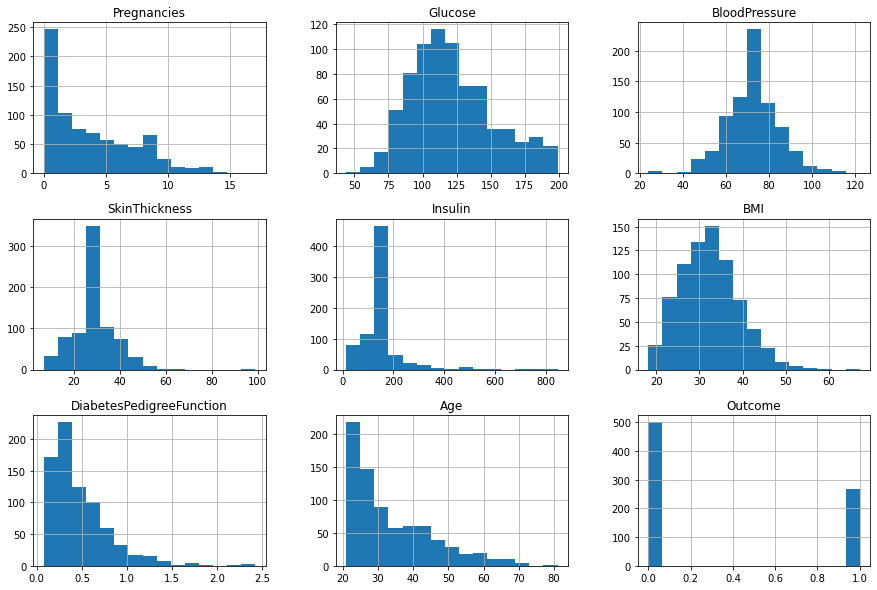

In [9]:
# checking distribution of values in columns after imputation

df.hist(bins=15,figsize=(15, 10))
plt.show()

In [10]:
# pairwise pearson correlations between all the variables

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218749,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208522,0.218749,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192615,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


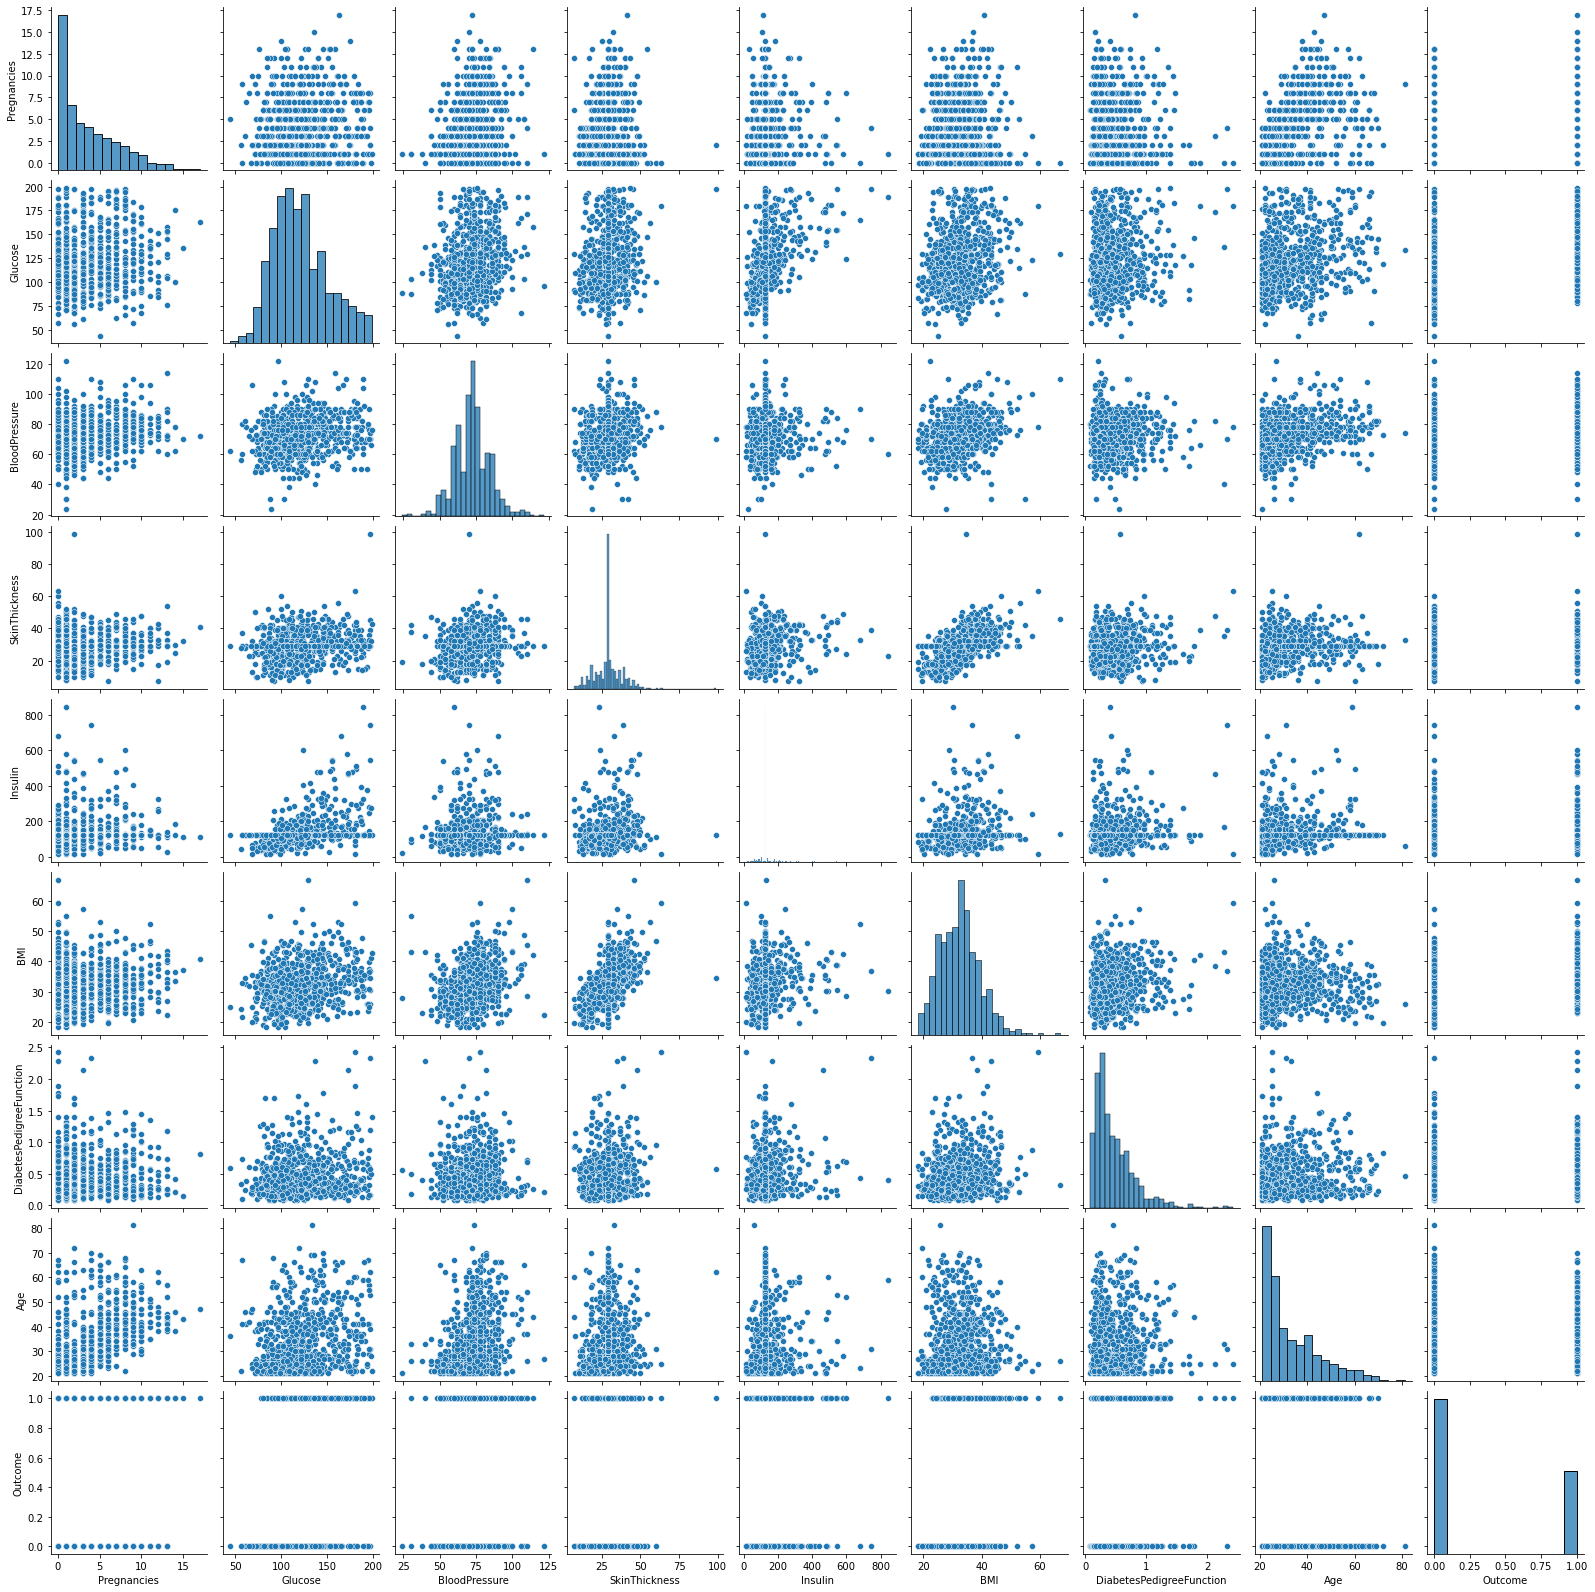

In [13]:
# pairplot of correlations between variables

sns.pairplot(df)
plt.show()

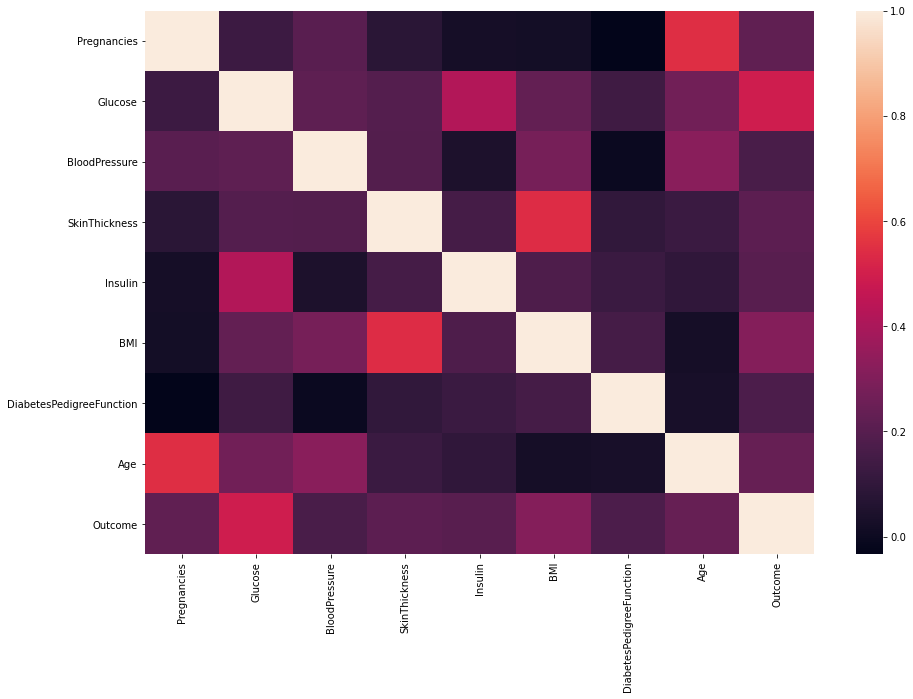

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax)
plt.show()

# Conclusion

### BMI & SkinThickness
There seems to be a fairly high positive correlation (Pearson correlation = 0.54) between BMI with SkinThickness. This makes sense because a high BMI indicates higher body fats, which in turns can result in higher skin thickness.
### Age & Pregnancies
There is also a fairly strong correlation between Age and Pregnancies (Pearson correlation = 0.54). Logically younger women are more likely to have had fewer pregnancies than older women.
### Glucose & Insulin
There is moderate correlation between Glucose and Insulin (Pearson correlation = 0.42). Insulin is normally produced by the body in response to glucose.
